In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime 
import csv  
import sqlite3

In [3]:
bp_df = pd.read_csv("oil_con_by_year_country.csv")

In [4]:
bp_df.head()

,Unnamed: 0,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,oilcons_ej,oilcons_kbd,oilcons_mt,oilcons_mtoe
0,0,Algeria,1965,12.550880,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.055459,26.716192,1.289,1.324613
1,1,Algeria,1966,12.902626,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.072982,35.353233,1.693,1.743139
2,2,Algeria,1967,13.275020,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.068191,33.285973,1.578,1.628722
3,3,Algeria,1968,13.663581,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.072602,35.374426,1.682,1.734076
4,4,Algeria,1969,14.061724,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.076701,37.714329,1.775,1.831980


In [5]:
bp_df = bp_df.rename(columns={"Unnamed: 0" : "ID"})

In [6]:
bp_df.head(1)

,ID,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,oilcons_ej,oilcons_kbd,oilcons_mt,oilcons_mtoe
0,0,Algeria,1965,12.55088,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.055459,26.716192,1.289,1.324613


In [7]:
db_file = 'db.sqlite'

In [2]:
gh_df = pd.read_csv('datasets_4736_7235_greenhouse_gas_inventory_data_data.csv')

In [3]:
gh_df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [5]:
gh_df.insert(0, "ID", range(0, len(gh_df)))

In [6]:
gh_df = gh_df.rename(columns={"country_or_area" : "Country"})

In [9]:
conn = sqlite3.connect(db_file)

cursor = conn.cursor()

sql = '''CREATE TABLE greenhouseGas(
    ID INT PRIMARY KEY, 
    Country CHAR,
    year INT, 
    value FLOAT,
    category CHAR
)'''

cursor.execute(sql)
print("Table created successfully..................")

conn.commit()

conn.close()

Table created successfully..................


In [9]:
bp_df.head(5)

,ID,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,oilcons_ej,oilcons_kbd,oilcons_mt,oilcons_mtoe
0,0,Algeria,1965,12.550880,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.055459,26.716192,1.289,1.324613
1,1,Algeria,1966,12.902626,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.072982,35.353233,1.693,1.743139
2,2,Algeria,1967,13.275020,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.068191,33.285973,1.578,1.628722
3,3,Algeria,1968,13.663581,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.072602,35.374426,1.682,1.734076
4,4,Algeria,1969,14.061724,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,0.076701,37.714329,1.775,1.831980


In [10]:
conn = sqlite3.connect(db_file)

cursor = conn.cursor()

sql = '''CREATE TABLE bp(
    ID INT PRIMARY KEY, 
    Country CHAR, 
    Year INT, 
    pop FLOAT, 
    ISO3166_alpha3 CHAR,
    ISO3166_numeric INT, 
    Region CHAR,
    SubRegion CHAR,
    OPEC INT,
    EU INT,
    OECD INT,
    CIS INT,
    oilcons_ej INT,
    oilcons_kbd INT,
    oilcons_mt INT,
    oilcons_mtoe INT
)'''

cursor.execute(sql)
print("Table Create Successfully------------")

conn.commit()

conn.close()

Table Create Successfully------------


In [11]:
conn = sqlite3.connect(db_file)

In [12]:
bp_df.to_sql("bp", conn, if_exists='append', index=False)

In [13]:
conn.close()

In [11]:
conn = sqlite3.connect(db_file)

In [12]:
gh_df.to_sql("greenhouseGas", conn, if_exists='append', index=False)

In [13]:
conn.close()

In [14]:

conn = sqlite3.connect(db_file)

def sql_fetch(conn):

    cursorObj = conn.cursor()

    cursorObj.execute('SELECT * FROM bp')

    rows = cursorObj.fetchall()

    for row in rows:

        print(row)

sql_fetch(conn)

conn.close()

(0, 'Algeria', 1965, 12.55088, 'DZA', 12, 'Africa', 'Northern Africa', 1, 0, 0, 0, 0.055458907, 26.71619178, 1.289, 1.324613237)
(1, 'Algeria', 1966, 12.902626, 'DZA', 12, 'Africa', 'Northern Africa', 1, 0, 0, 0, 0.072981739, 35.35323288, 1.693, 1.743138889)
(2, 'Algeria', 1967, 13.27502, 'DZA', 12, 'Africa', 'Northern Africa', 1, 0, 0, 0, 0.068191312, 33.2859726, 1.578, 1.628721506)
(3, 'Algeria', 1968, 13.663581, 'DZA', 12, 'Africa', 'Northern Africa', 1, 0, 0, 0, 0.072602285, 35.37442623, 1.682, 1.734075786)
(4, 'Algeria', 1969, 14.061724, 'DZA', 12, 'Africa', 'Northern Africa', 1, 0, 0, 0, 0.076701348, 37.71432877, 1.775, 1.831980224)
(5, 'Algeria', 1970, 14.464992, 'DZA', 12, 'Africa', 'Northern Africa', 1, 0, 0, 0, 0.087651651, 43.00991781, 2.032, 2.093523717)
(6, 'Algeria', 1971, 14.872253, 'DZA', 12, 'Africa', 'Northern Africa', 1, 0, 0, 0, 0.098784181, 48.87849315, 2.2880000000000003, 2.359419628)
(7, 'Algeria', 1972, 15.285992000000002, 'DZA', 12, 'Africa', 'Northern Africa',

In [14]:

conn = sqlite3.connect(db_file)

def sql_fetch(conn):

    cursorObj = conn.cursor()

    cursorObj.execute('SELECT * FROM greenhouseGas')

    rows = cursorObj.fetchall()

    for row in rows:

        print(row)

sql_fetch(conn)

conn.close()

(0, 'Australia', 2014, 393126.94699428795, 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent')
(1, 'Australia', 2013, 396913.93653029, 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent')
(2, 'Australia', 2012, 406462.84770359995, 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent')
(3, 'Australia', 2011, 403705.52831399103, 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent')
(4, 'Australia', 2010, 406200.993184341, 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent')
(5, 'Australia', 2009, 408448.47899963, 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent')
(6, 'Australia', 2008, 404237.82821407705, 'carbon_dioxide_co2_emissions

In [17]:
#US Greenhouse gas emission df 
us_df = gh_df.loc[gh_df["Country"] == "United States of America"]

In [21]:
us_df = us_df.loc[us_df["category"] == "greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent"]

In [22]:
us_df

,ID,Country,year,value,category
1998,1998,United States of America,2014,6.870446e+06,greenhouse_gas_ghgs_emissions_including_indire...
1999,1999,United States of America,2013,6.799979e+06,greenhouse_gas_ghgs_emissions_including_indire...
2000,2000,United States of America,2012,6.643011e+06,greenhouse_gas_ghgs_emissions_including_indire...
2001,2001,United States of America,2011,6.865398e+06,greenhouse_gas_ghgs_emissions_including_indire...
2002,2002,United States of America,2010,6.985457e+06,greenhouse_gas_ghgs_emissions_including_indire...
2003,2003,United States of America,2009,6.776230e+06,greenhouse_gas_ghgs_emissions_including_indire...
2004,2004,United States of America,2008,7.216415e+06,greenhouse_gas_ghgs_emissions_including_indire...
2005,2005,United States of America,2007,7.422208e+06,greenhouse_gas_ghgs_emissions_including_indire...
2006,2006,United States of America,2006,7.316144e+06,greenhouse_gas_ghgs_emissions_including_indire...
2007,2007,United States of America,2005,7.378775e+06,greenhouse_gas_ghgs_emissions_including_indire...


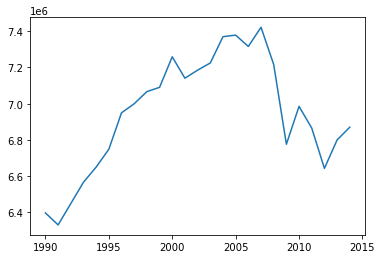

In [23]:
plt.plot(us_df["year"], us_df["value"])